# Worksheet 16

Name:  Sai Tejaswini Junnuri
UID: U92492167

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for i in range(len(X)):
        result += alpha_i[i] * Y[i] * np.dot(X[i], x)
    result += b
    return result

images = []
for _ in range(epochs):
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    
    prediction = predict(alpha_i, b, x)
    if y * prediction <= 0:  # Misclassified point
        alpha_i[i] += learning_rate
        b += y * learning_rate
        error = True
    else:
        error = False
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [2]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Lowering the degree of the polynomial kernel reduces the model's complexity. A high-degree polynomial can create a highly curved decision boundary, which might fit the training data very closely but fail to generalize well. Reducing n makes the decision boundary smoother and less prone to fitting noise in the training data.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

Increasing the value of σ makes the Gaussian kernel wider, allowing each training sample to influence a larger region. When σ is too small, the kernel's influence is very localized, leading to a model that cannot capture broader patterns in the data. A larger σ makes the decision boundary smoother and can help in capturing more global patterns, thus reducing underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

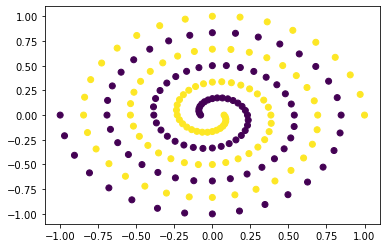

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

Text(0.5, 1.0, 'SVM with Polynomial Kernel')

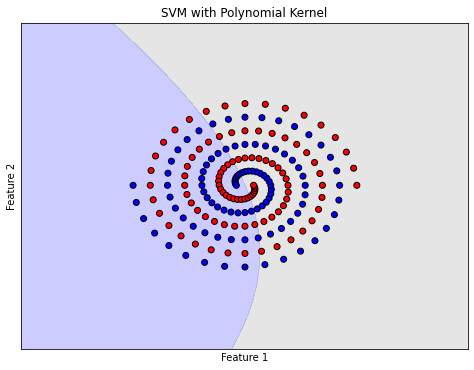

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Define the polynomial kernel function
def polynomial_kernel(x, y, d=2, r=1):
    return (np.dot(x, y) + r) ** d

# The predict function using the polynomial kernel
def predict(alpha_i, b, x, X, Y, kernel_function, d=2):
    result = 0
    for i in range(len(X)):
        result += alpha_i[i] * Y[i] * kernel_function(X[i], x, d)
    result += b
    return result

# The predict_many function using the polynomial kernel
def predict_many(alpha_i, b, Z, X, Y, kernel_function, d=2):
    return np.array([predict(alpha_i, b, z, X, Y, kernel_function, d) for z in Z])

# Generate synthetic data for the SVM
CENTERS = [[0, 1], [1, 0]]
X, Y = data[:, :2], data[:, 2]
#Y = np.array([-1 if label == 0 else 1 for label in labels])

# Initialize parameters for the SVM training
alpha_i = np.zeros(len(X))
b = 0
epochs = 100
learning_rate = 0.05

# Training the SVM using the polynomial kernel
for epoch in range(epochs):
    i = np.random.randint(0, len(X))
    x, y = X[i], Y[i]
    prediction = predict(alpha_i, b, x, X, Y, polynomial_kernel)
    if y * prediction <= 0:  # Misclassified point
        alpha_i[i] += learning_rate
        b += y * learning_rate

# Define the mesh grid for plotting
h = .01  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary
meshData = np.c_[xx.ravel(), yy.ravel()]
Z = predict_many(alpha_i, b, meshData, X, Y, polynomial_kernel).reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'gray', 'red'])
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel')